In [1]:
from Forecast_functions import * 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('Sales Data.txt', parse_dates=[0])

In [4]:
File_path = 'Sales Data.txt'
ProductCodes = [7000158, 7000043, 7000157, 7000022, 7003399]
plants = ['Bangalore New CFA', 'Delhi CFA', 'Zirakpur CFA']
Sales_Channels = ['CP-GT', 'RETAIL', 'CP-NMT']
models = ['arima', 'sarimax', 'rnn']

In [6]:
data1 = select_df(File_path='Sales Data.txt',
         ProductCode=ProductCodes[0],
         PlantCode=plants[0],
         Sales_Channel=Sales_Channels[0],
         freq='B')

C:\Disk D\Forecasting Models\Python Notebooks\Forecast_functions.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(freq).mean()
C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


<Axes: xlabel='Date'>

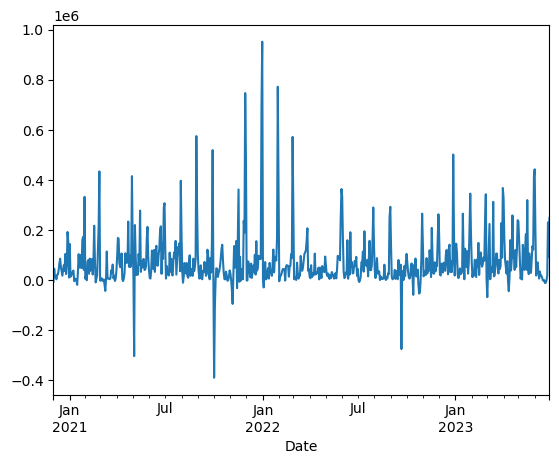

In [9]:
data1.Sales_Value.plot()

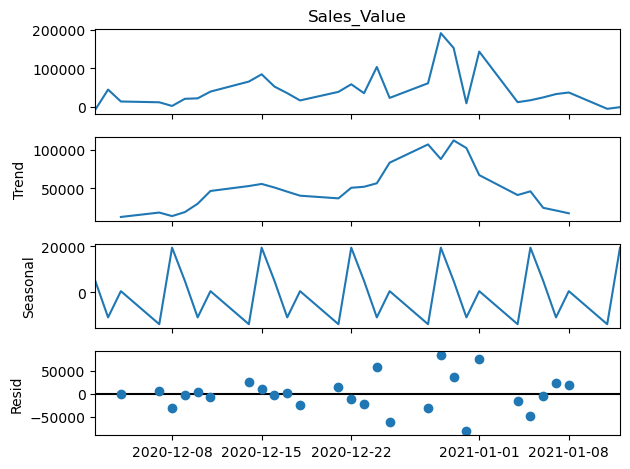

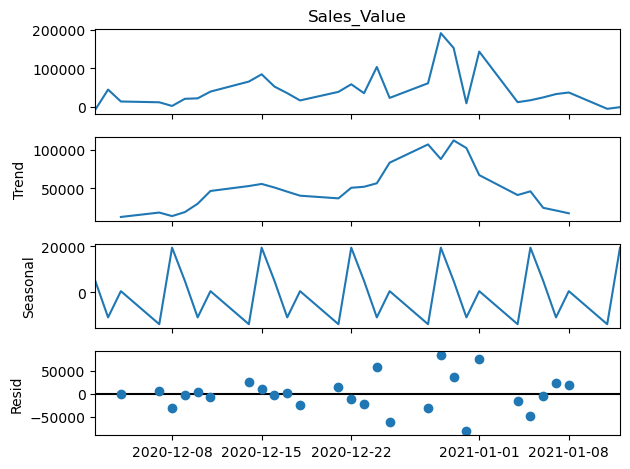

In [16]:
seasonal_decompose(data1['Sales_Value'].iloc[:30], model = 'additive').plot()

In [18]:
data1['diff7'] = data1['Sales_Value'] - data1['Sales_Value'].shift(7)

<Axes: xlabel='Date'>

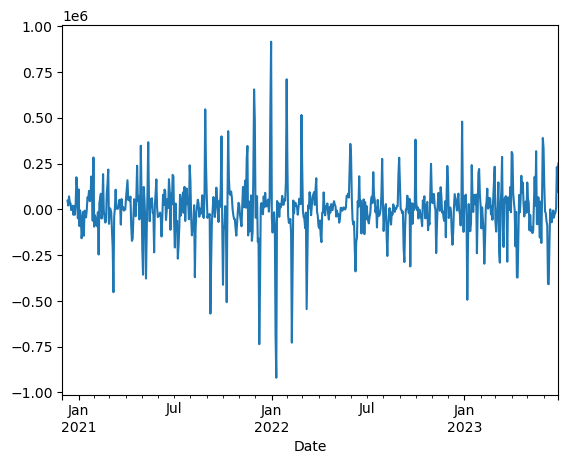

In [20]:
data1['diff7'].plot()

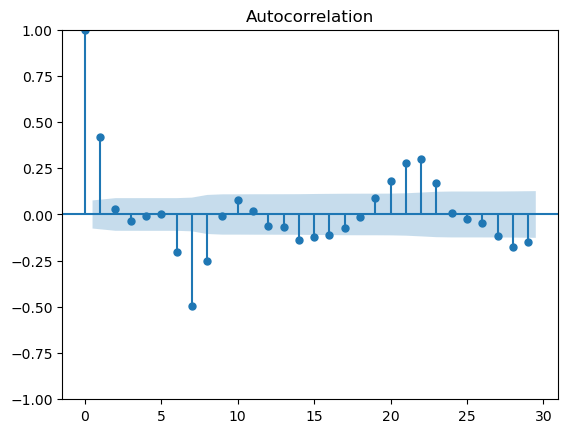

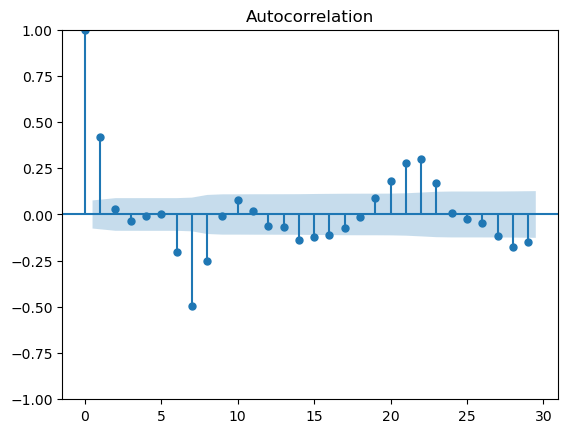

In [22]:
plot_acf(data1['diff7'].iloc[7:])

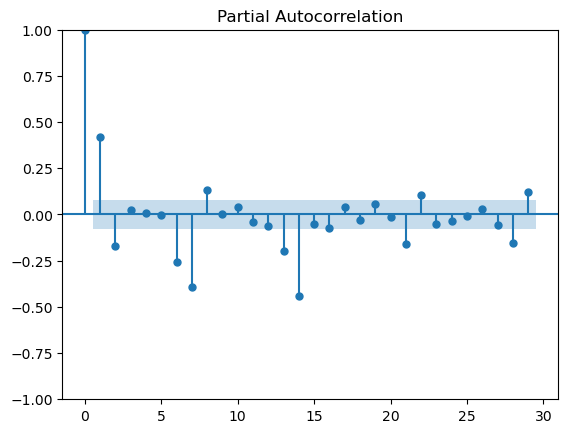

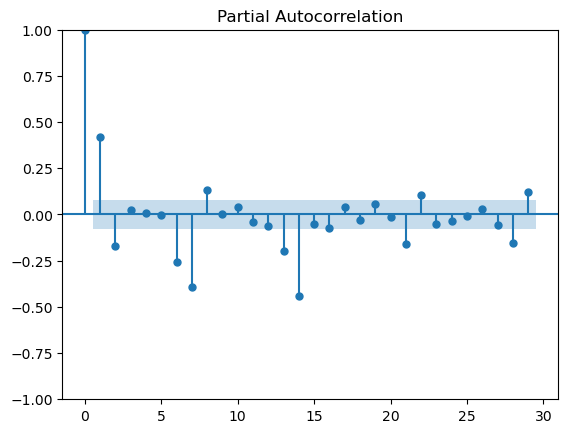

In [24]:
plot_pacf(data1['diff7'].iloc[7:])

In [48]:
train, test = train_test_split(data1['diff7'].iloc[7:], train_size = 0.7)

In [49]:
arima_1 = ARIMA(train, order = (2, 0, 2)).fit()

C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [50]:
arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  diff7   No. Observations:                  464
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -6144.324
Date:                Wed, 23 Aug 2023   AIC                          12300.647
Time:                        12:13:23   BIC                          12325.487
Sample:                    12-11-2020   HQIC                         12310.425
                         - 09-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -402.5979   1.03e+04     -0.039      0.969   -2.05e+04    1.97e+04
ar.L1         -1.2255      0.032    -37.736      0.000      -1.289      -1.162
ar.L2         -0.4477      0.032    -13.933      0.000      -0.511      -0.385
ma.L1          1.7956      0.034     52.903      0.000       1.729       1.862
ma.L2          0.9976      0.037     26.939      0.000       0.925       1.070
sigma2      2.045e+10      0.018   1.15e+12      0.000    2.04e+10    2.04e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.63   Jarque-Bera (JB):               853.37
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.38
Prob(H) (two-sided):                  0.17   Kurtosis:                         9.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+27. Standard errors may be unstable.
"""

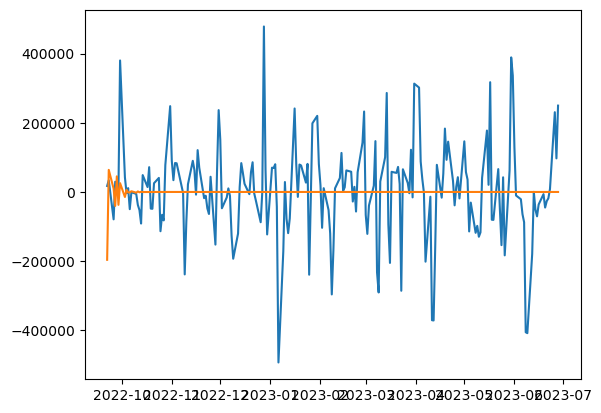

In [54]:
plt.plot(test)
plt.plot(arima_1.predict('2022-09-22', '2023-06-28'))

Date
2022-09-22     16954.77000
2022-09-23     33371.87000
2022-09-26    -79652.83000
2022-09-27     29233.94500
2022-09-28     -3851.26000
                  ...     
2023-06-22    -18850.87000
2023-06-23      7978.85355
2023-06-26    230489.57000
2023-06-27     96815.37000
2023-06-28    249546.65000
Freq: B, Name: diff7, Length: 200, dtype: float64